In [1]:
import pymc as pm
from matplotlib import pyplot as plt
import numpy as np
from pymc.Matplot import plot as mcplot

plt.style.use("classic")

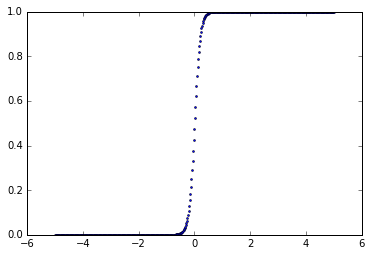

In [2]:
#data generation
def logistic(x, beta):
    return 1.0 / (1.0 + np.exp(beta * x))

#hidden
beta = -10

x = np.linspace(-5, 5, 500)
data = logistic(x, -10)

#plt.plot(x,data , label=r"$\beta = -10$")
plt.plot(x,data,'o',ms=2)
plt.show()


In [3]:

#Priors
beta = pm.Uniform("beta", -20, 20, value=1.)
sig = pm.Uniform("sig", 0.0, 100.0, value=1.)

In [4]:
@pm.deterministic
def logistic(x=x, beta=beta):
    return 1.0 / (1. + np.exp(beta * x))

 [-----------------100%-----------------] 20000 of 20000 complete in 3.1 sec-9.999991084531453
1.419352207184286e-06
Plotting beta
Plotting sig


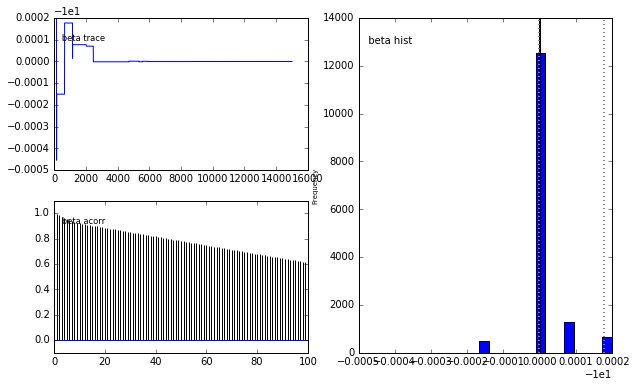

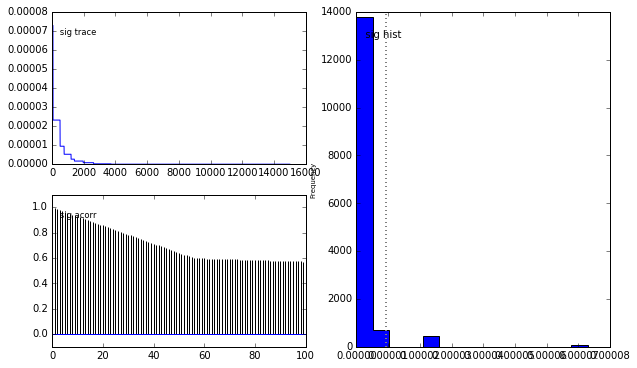

In [5]:
#likelihood
y = pm.Normal("obs", mu=logistic, tau=1.0/sig**2, value=data, observed=True)


model = pm.Model([y, data,beta,sig])
mcmc = pm.MCMC(model) 
mcmc.sample(20000, 5000, 1)


beta_samples = mcmc.trace('beta')[:]
sig_samples = mcmc.trace('sig')[:]

print beta_samples.mean()
print sig_samples.mean()

mcplot(mcmc.trace('beta'))
mcplot(mcmc.trace('sig'))
plt.show()


In [6]:
print beta_samples.mean()
print sig_samples.mean()

-9.999991084531453
1.419352207184286e-06


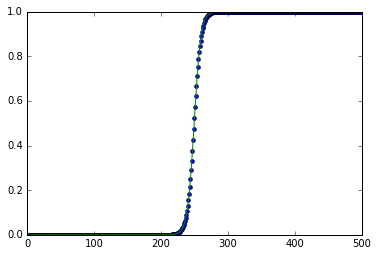

In [7]:
plt.plot(data,'o',ms=4)

My=1.0 / (1. + np.exp(-10 * x))
plt.plot(My)